In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("application_train.csv")

In [4]:
df['TARGET'].astype('category')
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

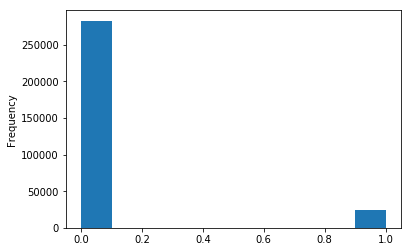

In [5]:
df['TARGET'].plot.hist()

In [6]:
miss_val_percent = 100*df.isnull().sum()/len(df)

In [7]:
miss_val = df.isnull().sum()

In [8]:
type = []
for y in df.columns:
    if(df[y].dtype == np.float64 or df[y].dtype == np.int64):
          type.append('Numeric')
    else:
          type.append('Categorical')

In [9]:
mis_val_table = pd.concat([miss_val, miss_val_percent], axis=1)

In [10]:
table = mis_val_table.rename(columns = {0: 'Missing Values', 1:"Percentage missing values"})
table['type'] = type

In [11]:
table = table.sort_values('Percentage missing values', ascending = False).round(2)
table.to_csv('missing_values.csv')

Text(0,0.5,'Number of Variables with Nulls')

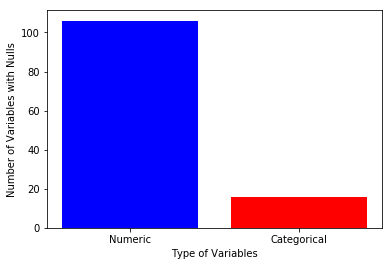

In [38]:
# Bar plot:
labels = 'Numeric','Categorical'
sizes = [table['type'].value_counts()[0], table['type'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.bar(height = sizes,  x=labels, color=['blue','red'])
ax1.set_xlabel('Type of Variables')
ax1.set_ylabel('Number of Variables with Nulls')

Text(0,0.5,'Number of Variables')

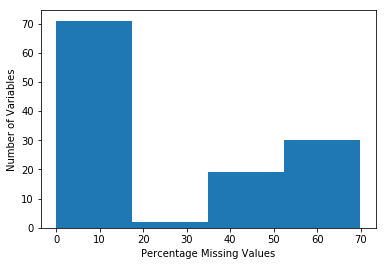

In [41]:
# Histogram:

fig1, ax1 = plt.subplots()
ax1.hist(x = table['Percentage missing values'],bins=4)
ax1.set_xlabel('Percentage Missing Values')
ax1.set_ylabel('Number of Variables')


In [12]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [93]:
df.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [42]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        #print(df[col].name)
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            #print(df[col].name)
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [43]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].value_counts().index[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].value_counts().index[0])
#df['EMERGENCYSTATE_MODE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].value_counts().index[0])
#df['HOUSETYPE_MODE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].value_counts().index[0])
#df['WALLSMATERIAL_MODE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].value_counts().index[0])


In [44]:
col_num = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

for col in col_num:
    df = df[df[col].isna()==False]

In [144]:
df.shape

(264374, 122)

In [145]:
df = pd.get_dummies(df)

In [169]:
df.shape
df.to_csv('application_train_2.csv')

In [45]:
(df['DAYS_BIRTH']/-365).describe()

count    264374.000000
mean         44.154391
std          11.803694
min          20.517808
25%          34.435616
50%          43.317808
75%          54.008219
max          69.043836
Name: DAYS_BIRTH, dtype: float64

In [46]:
df['DAYS_EMPLOYED'].describe()

count    264374.000000
mean      63515.981416
std      141097.152091
min      -17912.000000
25%       -2846.000000
50%       -1264.000000
75%        -303.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

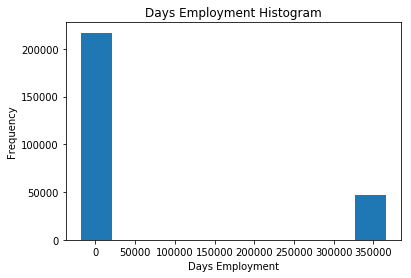

In [47]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [48]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]

In [49]:
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.30% of loans
The anomalies default on 5.16% of loans
There are 47430 anomalous days of employment


In [50]:
anom['TARGET'].mean()

0.05159181952350833

In [51]:
# Create an anomalous flag column
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243

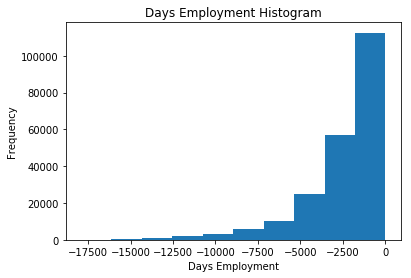

In [52]:
# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [53]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OWN_CAR_AGE                    0.036975
DAYS_REGISTRATION              0.040222
REG_CITY_NOT_LIVE_CITY         0.042941
FLAG_DOCUMENT_3                0.043653
FLAG_EMP_PHONE                 0.045067
DAYS_ID_PUBLISH                0.049044
REG_CITY_NOT_WORK_CITY         0.049269
DAYS_LAST_PHONE_CHANGE         0.050749
REGION_RATING_CLIENT           0.055396
REGION_RATING_CLIENT_W_CITY    0.057385
DAYS_EMPLOYED                  0.073633
DAYS_BIRTH                     0.076730
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.179251
EXT_SOURCE_1                 -0.153352
EXT_SOURCE_2                 -0.153301
DAYS_EMPLOYED_ANOM           -0.045082
FLOORSMAX_AVG                -0.043542
FLOORSMAX_MEDI               -0.043347
FLOORSMAX_MODE               -0.042935
AMT_GOODS_PRICE              -0.038149


In [54]:
# Find the correlation of the positive days since birth and target
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.07672970935126258

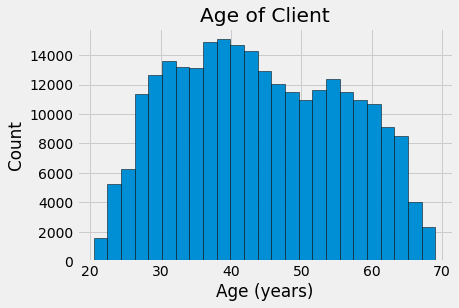

In [55]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

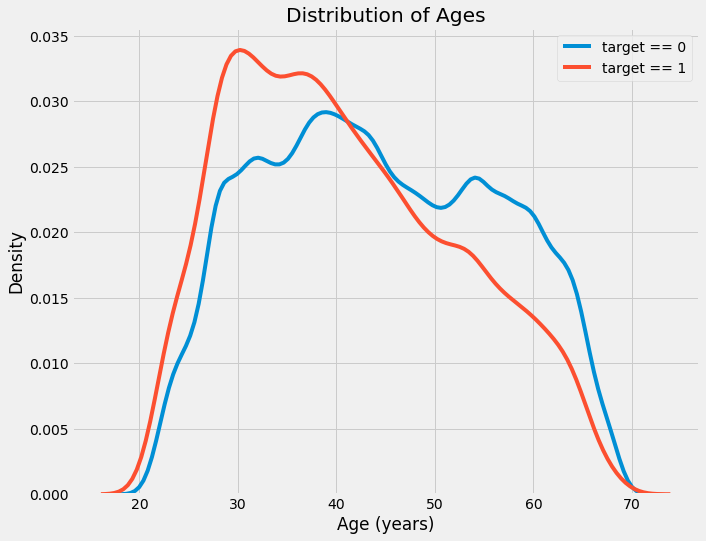

In [56]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df[df['TARGET'] == 0]['DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df[df['TARGET'] == 1]['DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [57]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
10,0,10197,27.936986,"(25.0, 30.0]"
11,0,20417,55.936986,"(55.0, 60.0]"


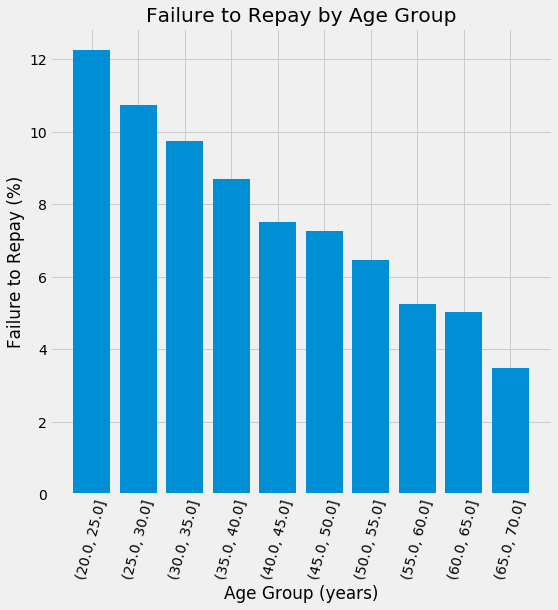

In [59]:
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [66]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Failure to Repay (%)', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.style.use('fivethirtyeight')
    plt.show();

application_train = df

In [60]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.153352,-0.153301,-0.179251,-0.076730
EXT_SOURCE_1,-0.153352,1.000000,0.206596,0.186967,0.595463
EXT_SOURCE_2,-0.153301,0.206596,1.000000,0.109187,0.082903
EXT_SOURCE_3,-0.179251,0.186967,0.109187,1.000000,0.205547
DAYS_BIRTH,-0.076730,0.595463,0.082903,0.205547,1.000000


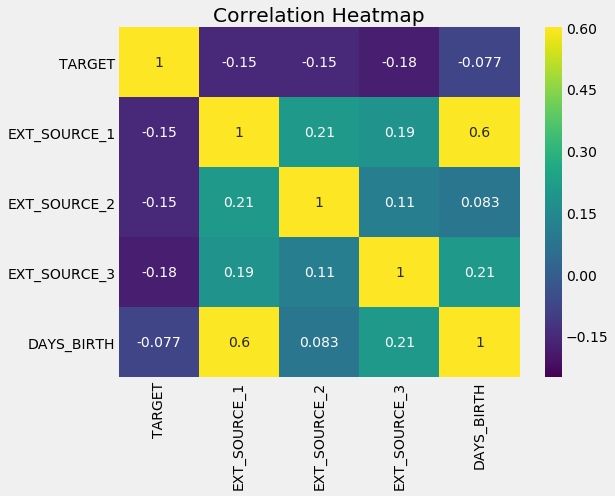

In [64]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = 'viridis', vmin = -0.25, vmax = 0.6, annot = True)
plt.title('Correlation Heatmap');

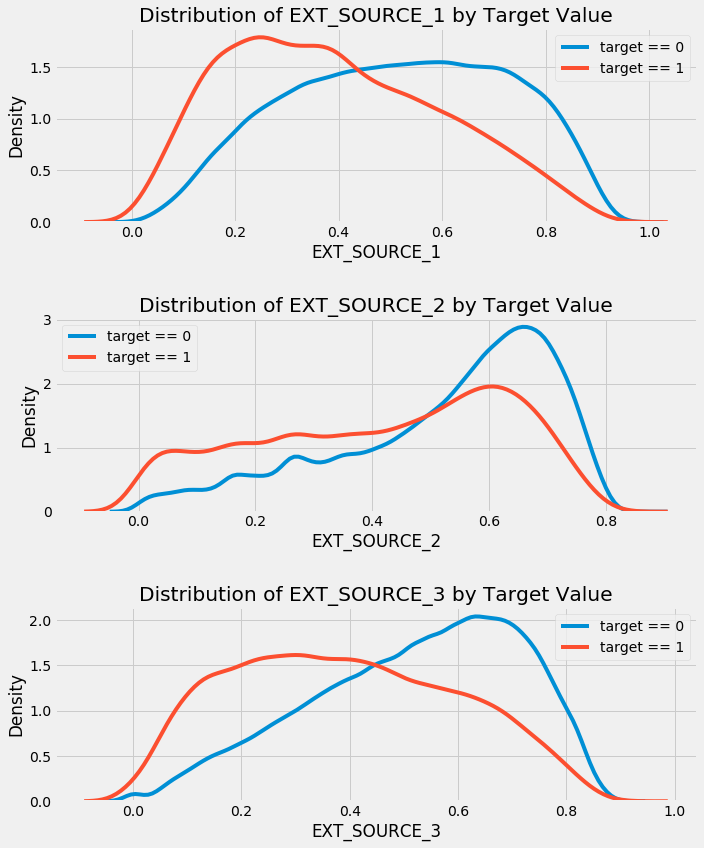

In [165]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/kmanchel/anacon

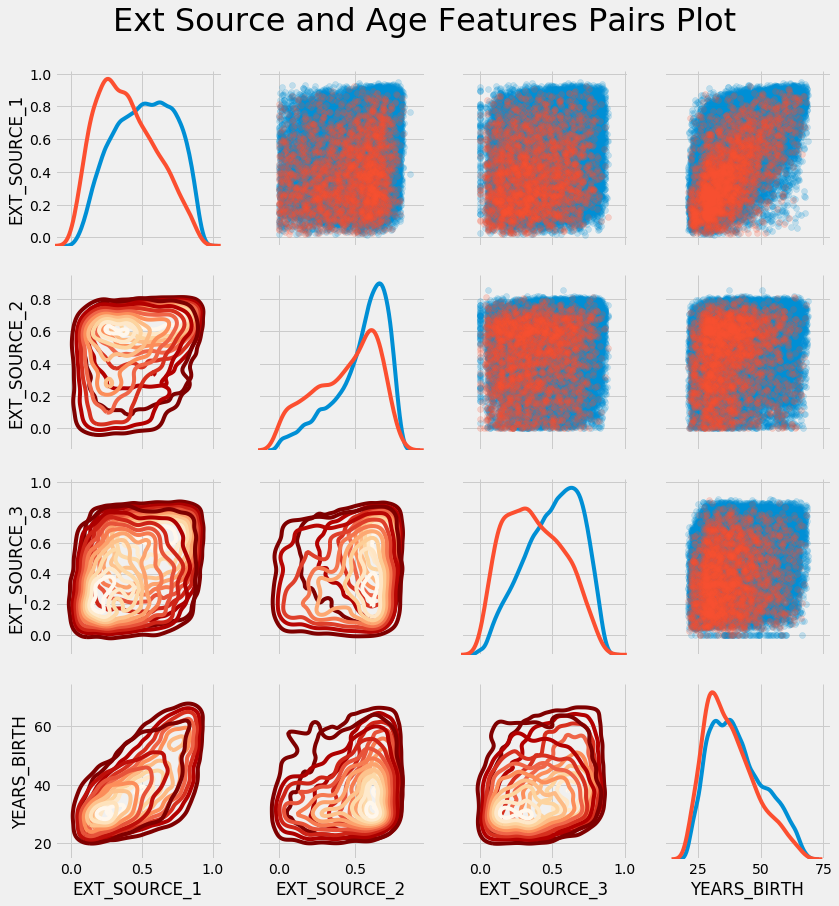

In [166]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);


#Feature Engineering

#Polynomial features

In [44]:
poly_features = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)


from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [45]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)

In [46]:
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [47]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [48]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                          'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [49]:
# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [50]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df['SK_ID_CURR']
df_poly = df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

print('Training data with polynomial features shape: ', df_poly.shape)

Training data with polynomial features shape:  (307511, 280)


In [51]:
df.shape

(307511, 244)

Domain knowledge features

In [52]:
df_domain = df.copy()

df_domain['CREDIT_INCOME_PERCENT'] = df_domain['AMT_CREDIT'] / df_domain['AMT_INCOME_TOTAL']
df_domain['ANNUITY_INCOME_PERCENT'] = df_domain['AMT_ANNUITY'] / df_domain['AMT_INCOME_TOTAL']
df_domain['CREDIT_TERM'] = df_domain['AMT_ANNUITY'] / df_domain['AMT_CREDIT']
df_domain['DAYS_EMPLOYED_PERCENT'] = df_domain['DAYS_EMPLOYED'] / df_domain['DAYS_BIRTH']

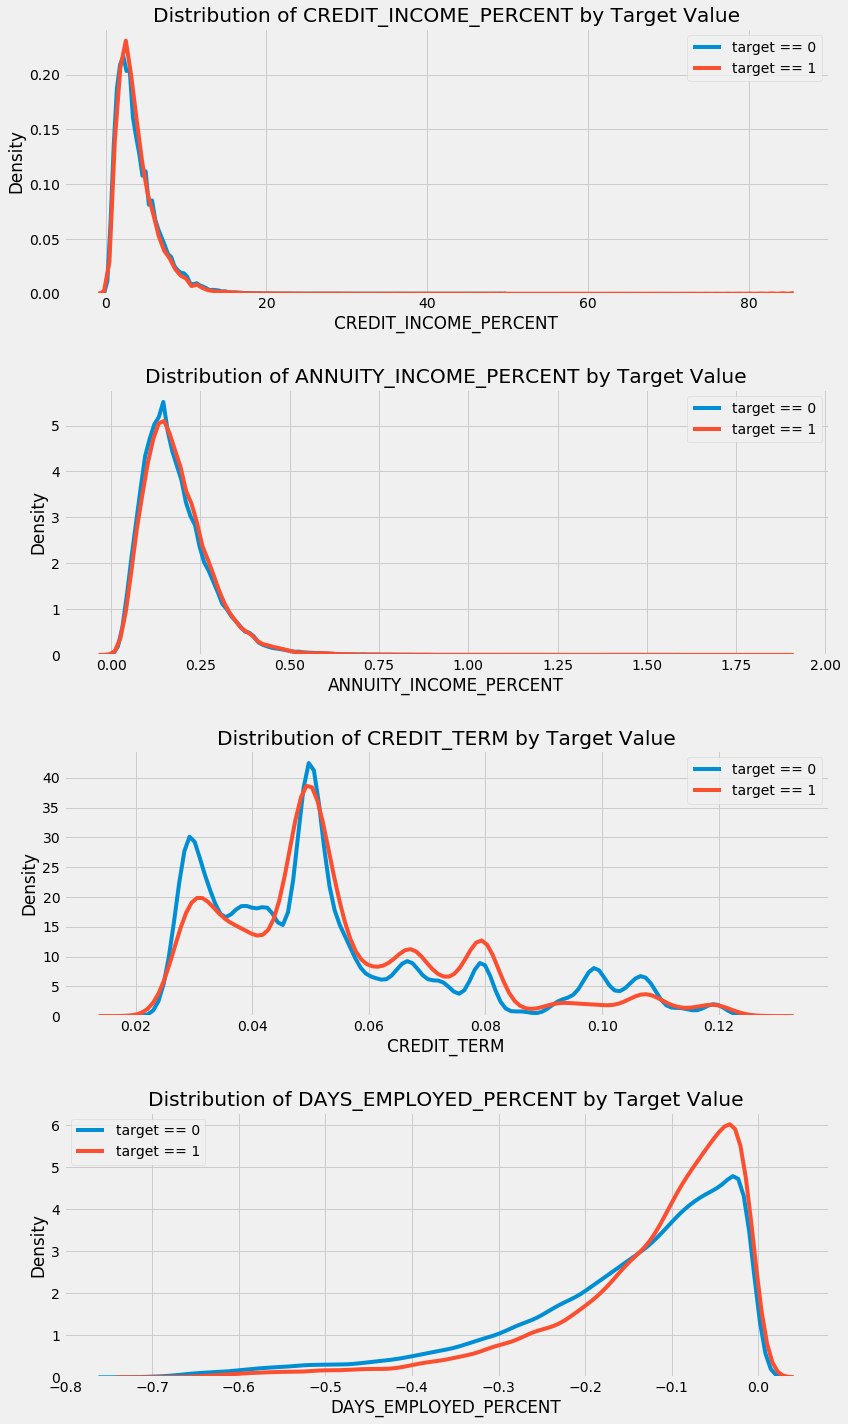

In [53]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)